# Lesson 10: Properties of relations

## Overview

__Summary:__ Now that we've learned about _relations_ (in Lesson 9) and how to represent them, we are going to learn about ways to describe the particular features that various relations have. The major features of relations on a single set can be summed up by four __properties__ that relations may have or not have: __reflexivity__, __symmetry__, __antisymmetry__, and __transitivity__. In the notes, we will define what these terms mean via examples from social networks and mathematical relations. Then in the class activities we will try to understand how to determine whether a relation has some or all of these properties and construct examples of relations that have some, and do not have others, of these properties. 

This lesson addresses the following learning target(s): 

+ __RE.1:__ I can give examples of relations on a set that have combinations of various relation properties (symmetry, antisymmetry, reflexivity, transitivity, being an equivalence relation, being a partial order).
+ __RE.3:__ I can represent a relation on a set as a list of tuples, an adjacency matrix, a directed graph, or a Python dictionary and convert from one representation to another.

## Background 

To properly study these notes, you will need to __download this notebook and upload it to SageMath Cloud so that you can interact with the code cells that are contained here.__ This will be the case for many of our Lesson Notes from this point forward. Remember, to download this notebook, do the following: 

1. Make sure you are viewing it on nbviewer, then click the download icon that is in the upper-right corner of the page. This will download it to your computer; make sure that you know where your downloads go. 
2. Then upload it to SageMath Cloud as you learned how to do in the Technology and Coding Module. (Refer back to that assignment if you've forgotten how.) 
3. Once you have opened it in SageMath Cloud, make sure that you have changed the kernel from Python to SageMath. Instructions on how to do this are in the [lesson notes for Lesson 8](http://nbviewer.jupyter.org/github/RobertTalbert/discretecs/blob/master/lessons/lesson8.ipynb).

A copy of the Jupyter notebook is posted to Blackboard just in case you run into difficulties. 

### Recurring examples for this lesson

We will be looking at several different recurring examples through these notes to illustrate the properties that we want to study. We will actually continue to refer to these relations in future lessons since they are simple and familiar. 

The first group of relations have to do with mathematical operations. A little boring maybe, but useful. 

+ __The "divides" relation.__ Define the "divides" relation on the set of positive integers as follows: An integer $a$ is related to another integer $b$ if $a$ divides $b$. For example $(3,15)$ would belong to this relation but $(3, 14)$ would not. 
+ __The "less than or equal to" relation.__ Define the "less than or equal to" relation on the set of positive integers as follows: An integer $a$ is related to another integer $b$ if $a \leq b$. For example $(3,14)$ and $(3,3)$ would belong to this relation but $(3, 2)$ would not.
+ __The "less than" relation.__ You guessed it -- Define the "less than" relation on the set of positive integers as follows: An integer $a$ is related to another integer $b$ if $a < b$. For example $(3,14)$ would belong to this relation but $(3, 2)$ and $(3,3)$ would not.
+ __The "is next to" relation.__ Define this relation on the set of positive integers as follows: An integer $a$ is related to another integer $b$ if $|a - b| = 1$. Visually this would mean that $a$ and $b$ are "next to" each other on the number line. For example $(3,4)$ and $(4,3)$ are in this relation but $(3,5)$ is not. 

The second group has to do with popular social networks. If you are not a social network person and are unfamiliar with the terms being used here, please ask a question or hit Google for answers. 

+ __The Twitter relation.__ Define the Twitter relation on the set of all Twitter accounts (users) by declaring user $x$ to be related to user $y$ if $x$ follows $y$ on Twitter. 
+ __The Facebook relation.__ Define the Facebook relation on the set of all Facebook accounts (users) by declaring user $x$ to be related to user $y$ if $x$ has friended $y$ on Facebook.
+ __The LinkedIn relation.__ [LinkedIn](http://www.linkedin.com) is a little less well known, so here is a description. It's a "professional" social network in which a user can ask another user to "connect" (like friending or following) based on whether the first user has some sort of job or educational connection to the second person. The second person then either accepts or rejects the offer to connect. If accepted, then LinkedIn's software uses the information in the two users' profiles to suggest further connections. Once the two users have connected, this is registered with LinkedIn as a "first level connection". (It's actually pretty helpful if you just go join LinkedIn and see for yourself how it works.) 
+ __The Perfect LinkedIn relation.__ This is a fake social network that we will create for illustration purposes. In ordinary LinkedIn, two users who connect receive recommendations for other users to follow based on a "level" of connection. For example, if Alice and Bob have connected, then this is a first-level connection. If Bob has connected with Chuck, but Alice hasn't, then LinkedIn will recommend that Alice connect with Chuck because this is a "second level connection". Likewise if Dave has connected with Chuck, then Alice has a connection with Bob, Bob with Chuck, and Chuck with Dave -- so this is a "third level connection" between Alice and Dave. LinkedIn will recommend that Alice and Dave connect directly. __Perfect LinkedIn is what you get when all recommended connections between users are made.__ In this ideal world, any two people who  have a distant connection are connected directly. So another way to put this is: __User X and User Y are related in Perfect LinkedIn if there is some path of connections, no matter how long, from X to Y.__ 

### Reflexive relations

Let's construct some small versions of a few of the relations above. Again this works best if you are interacting with the code cells here. 

Here is a small version of the less than/equal to relation, on just the set $\{1,2,4,6,8\}$. The code enters the relation as a list of tuples for you, the constructs the digraph for the relation. Put your cursor in the code cell and execute it to see the results.  

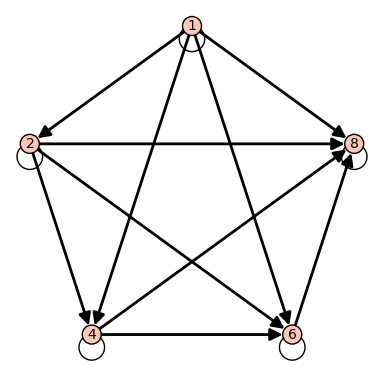

In [1]:
simpleleq = [(1,1), (1,2), (1,4), (1,6), (1,8),
             (2,2), (2,4), (2,6), (2,8),
             (4,4), (4,6), (4,8),
             (6,6), (6,8), 
             (8,8)]
sleqgraph = DiGraph(simpleleq, loops=True)
sleqgraph.show(layout="circular")

And here's a simplified version of the "less than" relation defined on the same set. It's obviously going to be similar to the relation above. What's the big difference? 

In [ ]:
simplelt = [(1,2), (1,4), (1,6), (1,8),
            (2,4), (2,6), (2,8),
            (4,6), (4,8),
            (6,8)]
sltgraph = DiGraph(simplelt, loops=True)
sltgraph.show(layout="circular")

The only difference of course is the _loops_. The less than/equal to relation has them, the strict less-than relation does not. That's because in the less than/equal to relation, __each point in the set is related to itself__ and in the strict less-than relation, that is not the case. In the language of our "set of tuples" way of representing the relation, we see that the pair $(a,a)$ is in the relation for every $a$ in the set. 

This motivates the formal definition of the first of our properties: 

>__Definition:__ Let $r$ be a relation on the set $A$. Then $r$ is said to be __reflexive__ if $(a,a) \in r$ for every $a \in A$. 

In a reflexive relation, every point in the set on which the relation is defined is related to itself. In a non-reflexive relation, there may be _some_ points that are related to themselves but there is at least one point that is not related to itself. 

Social networks are very rarely reflexive. None of Twitter, Facebook, or LinkedIn (or Perfect LinkedIn) is reflexive because the rules of the network don't allow people to friend, follow, or connect with themselves. (More precisely, an _account_ cannot connect with itself. If I made two different Twitter accounts both for myself and had them follow each other, this wouldn't count as reflexive.) 

### Symmetric relations

Now let's have you look at the "is next to" relation, simplified so it's only defined on the set $\{1,2,3,4\}$. Remember this relation is defined by saying $a$ is related to $b$ if $|a-b| = 1$. This time you're going to enter the relation as a list of tuples into the code cell, where indicated. Then run the cell to see the results. ([The correct version of this set is here](https://gist.github.com/RobertTalbert/de2d9fa508caa6544120), but only look at this once you have tried to construct it yourself first.) 

In [ ]:
simplenextto = # Put your code here 

simplenexttograph = DiGraph(simplenextto, loops=True)
simplenexttograph.show(layout="circular")

Now compare this graph to the strict less-than graph from above (_not_ less-than-or-equal to). You should notice first that neither of these relations is reflexive. But what's one big difference in the behavior of these two relations? STOP and think about it. 

You've stopped and thought about it, right? If not, stop and think about it. 

You might point out several things here, but the big thing to notice this time is that in the next-to relation, all the arrows point in both directions. When a point $a$ is related to a point $b$, then $b$ is also related to $a$. Whereas, in the less-than relation this is not the case. In the language of sets of tuples, we see that in the next-to relation, whenever $(a,b)$ belongs to the list, so does $(b,a)$. (Remember that a tuple here is really just an abstracted version of an arrow.)

That gets us to the next definition: 

>__Definition:__ Let $r$ be a relation on the set $A$. Then $r$ is said to be __symmetric__ if whenever $(a,b) \in r$, we also have $(b,a) \in r$. 

Notice that this definition, unlike the one for reflexive, is a _conditional statement_ -- it's in the form of "if-then". _If_ $(a,b) \in r$ _then_ $(b,a) \in r$. It does not say anything about _whether_ two points are connected in the first place. So for example, a relation in which _no_ two points are related -- its digraph would just be a bunch of disconnected nodes -- is technically symmetric, because the "if" part of the definition is never satisfied and so the condition for being symmetric never fails. A relation _fails_ to be symmetric when _there exists_ a pair $(a,b)$ in the relation but $(b,a)$ is not -- for example the pair $(4,6)$ in the less-than relation. 

In social networks, LinkedIn and Facebook are both symmetric by definition -- according to the rules of the network, a user cannot friend or connect another unless the other user friends or connects them back. But Twitter is highly non-symmetric because although there are plenty of instances where two users follow each other, there are also plenty of instances where a user follows another but not vice versa. (I (`@RobertTalbert`) follow Pope Francis (`@pontifex`) for example but the Holy Father does not, sadly, follow me.) 

### Antisymmetric relations

Now let's look at the "divides" relation, again restricted to a small set just to keep things simple -- let's use $\{2, 4, 6, 8, 10\}$. Once again, enter the relation as a list of tuples below, and then execute the code to see the digraph. Again the answer is [here](https://gist.github.com/RobertTalbert/de2d9fa508caa6544120) but do it yourself first. 

In [ ]:
simpledivides = # Enter your tuple list here

sdgraph = DiGraph(simpledivides, loops=True)
sdgraph.show(layout='circular')

For another relation to compare this to, we'll go back to Lesson 8 and look at BookFace, the fake social network we created on a five-user set to motivate the concept of relations. Here are the data and commands to create the digraph: 

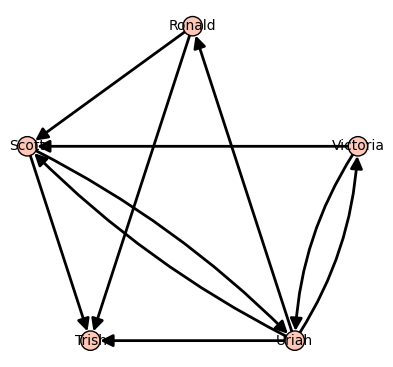

In [9]:
bookface = {'Ronald': ['Trish', 'Scott'],
 'Scott': ['Trish', 'Uriah'],
 'Trish': [],
 'Uriah': ['Ronald', 'Trish', 'Scott', 'Victoria'],
 'Victoria': ['Uriah', 'Scott']}

bfgraph = DiGraph(bookface, loops=True)
bfgraph.show(layout="circular")

The big difference between these two relations is a little harder to notice but it's very clear once it's pointed out: __In the first relation (divides), arrows _always_ point in one direction and never vice-versa. In the second relation, it's possible to have a two-directional connection.__ Although it's _sometimes_ the case in BookFace that we have one-direction-only relations (Victoria to Scott, for instance) we also sometimes have two-directional relations (Victoria to Uriah and back). In the divides relation, we _never_ have two-directional relations. 

Here is a formal definition that we will use to capture the meaning of this concept: 

>__Definition:__ Let $r$ be a relation on a set $A$. Then $r$ is said to be __antisymmetric__ if for all $a,b \in A$, whenever $(a,b) \in r$ and $(b,a) \in r$, we must have $a = b$. 

This is a standard but somewhat confusing definition, so let's look at it informally first and then give an alternative but logically equivalent definition. 

Informally, this definition is saying that if two "different" points have a two-directional relationship, they really _aren't_ two different points -- they are _equal_ to each other. This is really captured by the "divides" relation: If two positive integers divide each other, then the only logical conclusion is that they are the same integer. 

But it still can be wierd to think about two "different" points being the same, so here is an alternative definition that might be clearer. It is using the [contrapositive](http://www.regentsprep.org/regents/math/geometry/gp2/lcontrap.htm) of the if-then statement in the main definition. 

>__Alternate definition:__ Let $r$ be a relation on a set $A$. Then $r$ is said to be __antisymmetric__ if given $a,b \in A$, if $a \neq b$, then either $(a,b) \not \in r$ or $(b,a) \not \in r$. 

In English, this is saying that in an antisymmetric relation, if we have two different points, it must be the case that one of them is not related to the other. In other words there cannot be two-directional relations _anywhere_ in an antisymmetric relation. This is exactly what you saw with the "divides" graph -- no two-directional relations. (Sometimes no relations at all -- but never any going both ways.) So the "divides" relation is antisymmetric. 

To _fail_ to be antisymmetric, a relation would have at least one pair of points where there _is_ a two-directional relation -- like in BookFace. Therefore BookFace and other social networks where two-directional relations are allowed are _not_ antisymmetric. This seems to be the case for _all_ social networks; can you think of a social network where two-directional relations are against the rules? (One possible such "social network" that comes to mind is a military or corporate chain of command, where officers or vice presidents report to others "up the chain" but never backwards. This would be a network that _is_ antisymmetric because there are no bi-directional connections.)

Question (for the preview activities): Does "antisymmetric" just mean "not symmetric"? 

### Transitive relations 

It's time for our last property, and it's considered by those who use relations in computer applications to be the most important one. 

Go back and look at the directed graphs for the "divides" and "next to" relations, which you generated above. For each one, do the following exercise: Can you find a pair of points that are connected by a path of exactly two edges, that are not directly connected? Look through several pairs of points in each relation.

What you should find is: 

+ In the "divides" relation, this never happens. Any two points that are connected by a path of two edges, are actually directly connected. 
+ But in the "next to" relation it should be clear that there are points that are connected by a path of two edges, but not directly. 

So in some relations, like "next to", it's possible for nodes to be "distantly related" without being actually related. While in others, _any_ length of connection, no matter how distant, forces a direct connection. 

This gives us our last definition: 

>__Definition:__ Let $r$ be a relation on a set $A$. Then $r$ is said to be __transitive__ if for all $a,b,c \in A$, if $(a,b) \in r$ and $(b,c) \in r$, we have $(a,c) \in r$. 

This captures the essence of the little exercise you just did. In a transitive relation, if two nodes are connected by a path of two edges ($(a,b)$ and $(b,c)$ are both in the relation) then they must be directly connected ($(a,c)$ is in the relation) and this must happen _every time_ two nodes are connected by a path of length 2. 

A relation would _fail_ to be transitive if there existed two nodes that were connected by a path of length 2 that were _not_ directly connected, like in the "next to" relation. Even if a relation has _some_ instances where such nodes are directly connected but just a _single instance_ where they are not, then the relation fails to be transitive. Note the universal quantifier in the definition. 

In social networks, transitivity often fails. For example, on Twitter I follow the [Swansea City AFC soccer team account](http://twitter.com/SwansOfficial) (`@SwansOfficial`) and that account follows Raheem Hanley (`@RaheemHanley`, one of the members of the team) but I do not follow Raheem Hanley. Although, there are some instances of transitive behavior here, because for example `@SwansOfficial` follows `@AyewAndre` (Andre Ayew, a forward for the team) and I also follow `@AyewAndre`. But because this "closing the loop" behavior doesn't _always_ happen, we see that Twitter is not transitive. Nor is Facebook or LinkedIn. 

However, _Perfect LinkedIn_ is transitive by definition. Remember we created this social network by saying _any two users that have even a distant connection, we will connect them directly_. Therefore it's impossible in this ideal state to be distantly connected to anybody! This is the end goal of LinkedIn -- to "close the loop" on all distant connections. 

"Closing the loop on distant connections" is actually a very important idea for _any_ network -- for example a network of fiber optic cables that connect buildings on a campus. If Mackinac is connected to Kindschi and Kindschi is connected to Kirkhof by expensive fiber-optic cables, there are reasons people might want to directly connect Mackinac and Kirkhof. 


### Part 6: Where we will go from here 

In the near term, what we will do next -- starting with Preview Activities and continuing into class work -- is play with these relations and ask ourselves if we can construct examples of relations on a set that have a pre-determined combination of these properties. For example, can we come up with an example of a relation on the set $\{1,2,3,4\}$ that is 

+ Reflexive but not transitive? 
+ Reflexive, symmetric, and transitive? 
+ Reflexive but not symmetric? 
+ Both symmetric and antisymmetric? 

This is the goal of learning target RE.1. 

In the longer term, we want to focus on three concepts: 

+ Relations that are reflexive, symmetric, and transitive. It turns out these relations are quite common and useful because they mimic "equality" without insisting on literal equality of objects. This we will do in Lesson 11. 
+ Relations that are reflextive, antisymmetric, and transitive. These are also very useful for us because they mimic the "less than or equal to" relation and so allow us to think about _orderings_ of objects in situations where the objects are not numbers. This we will do in Lesson 12. 
+ The idea of "distant connections" and transitivity. In particular we will want to think about the question: How many edges do I need to add to a non-transitive relation in order to create a new relation that _is_ transitive? This we will do in Lesson 13. 

## Preview Activities

These are found on Formative here: https://goformative.com/student/#/assignments/GHEC663

And they are due no later than one hour before class time on the day we discuss the Preview Activities for Lesson 10; see your class calendar for dates 

## Daily Homework 

Come up with examples of relations on the set $\{1,2,3,4,5\}$ that have the following combinations of properties. Your relations can be in any format you like: Lists of tuples, directed graphs, dictionaries, or adjacency matrices. Most students find the directed graph representation to be easiest to work with, but your mileage may vary and feel free to mix it up. You can simply hand-draw the directed graphs for class discussion, but you are also encouraged to get practice with SageMath in coding these up and converting to different formats. 

If you use SageMath to work on this, please note that you can just use the numbers 1, 2, 3, 4, 5 as integers -- you do not have to convert them to strings, like we did with BookFace. This saves a lot of typing. 

1. Reflexive but not symmetric
2. Symmetric but not reflexive
3. Reflexive and symmetric but not transitive 
4. Reflexive and transitive but not symmetric
5. Antisymmetric and transitive but not reflexive 
6. Transitive but not antisymmetric 
7. Neither reflexive nor symmetric nor transitive 
8. Reflexive and antisymmetric and transitive 

__Bonus question:__ Consider the relation on $\{1,2,3,4,5\}$ that is just the empty set, `[ ]`. (This is actually the empty _list_, not a set, but this is how you'd enter the "set of tuples" into Python.) That is, there are no connections (edges) whatsoever, just nodes. Which properties does this relation have and which does it not have?